In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("data/nwsl_minutes.csv", index_col=[0, 1])
idx = df.index.names
df

15     16  17  18     19      20      21      22  \
team year                                                                     
BOS  2016                 NaN    NaN NaN NaN    NaN     NaN   100.0  1429.0   
     2017                 NaN    NaN NaN NaN    NaN     NaN  1559.0  1626.0   
CHI  2016                 NaN    NaN NaN NaN    NaN     NaN     NaN  1647.0   
     2017                 NaN    NaN NaN NaN    NaN     NaN   134.0   327.0   
     2018                 NaN    NaN NaN NaN    NaN     NaN    90.0   521.0   
...                       ...    ...  ..  ..    ...     ...     ...     ...   
WAS  2022                 NaN    NaN NaN NaN  270.0  1234.0     NaN   300.0   
     2022 Challenge Cup   NaN    NaN NaN NaN  522.0     NaN     NaN   418.0   
     2023                75.0  213.0 NaN NaN    NaN   624.0  1011.0  1731.0   
     2023 Challenge Cup  74.0  251.0 NaN NaN    NaN     NaN     NaN   659.0   
WNY  2016                 NaN    NaN NaN NaN    NaN    45.0  1388.0  4492.0   

                             23      24  ...     33     34  35  36  37  38  \
team year                                ...                                 
BOS  2016                3093.0  4263.0  ...    NaN    NaN NaN NaN NaN NaN   
     2017                4395.0  5899.0  ...  804.0    NaN NaN NaN NaN NaN   
CHI  2016                6440.0  2912.0  ...    NaN    NaN NaN NaN NaN NaN   
     2017                2682.0  6555.0  ...    NaN    NaN NaN NaN NaN NaN   
     2018                 485.0  5950.0  ...    NaN    NaN NaN NaN NaN NaN   
...                         ...     ...  ...    ...    ...  ..  ..  ..  ..   
WAS  2022                6404.0   708.0  ...  195.0  180.0 NaN NaN NaN NaN   
     2022 Challenge Cup  1529.0   387.0  ...  455.0    NaN NaN NaN NaN NaN   
     2023                1951.0  4124.0  ...   19.0    NaN NaN NaN NaN NaN   
     2023 Challenge Cup  1131.0  1035.0  ...   36.0    NaN NaN NaN NaN NaN   
WNY  2016                5995.0  2131.0  ...    NaN    NaN NaN NaN NaN NaN   

                         39  40     41  42  
team year                                   
BOS  2016               NaN NaN    NaN NaN  
     2017               NaN NaN    NaN NaN  
CHI  2016               NaN NaN    NaN NaN  
     2017               NaN NaN    NaN NaN  
     2018               NaN NaN    NaN NaN  
...                      ..  ..    ...  ..  
WAS  2022               NaN NaN    NaN NaN  
     2022 Challenge Cup NaN NaN    NaN NaN  
     2023               NaN NaN  181.0 NaN  
     2023 Challenge Cup NaN NaN  360.0 NaN  
WNY  2016               NaN NaN    NaN NaN  

[118 rows x 28 columns]

## Calculate weighted mean age for each team/season

In [7]:
rates = df.div(df.sum(axis=1), axis=0)
rates.index.names = idx
rates

15        16  17  18        19        20  \
team year                                                                 
BOS  2016                     NaN       NaN NaN NaN       NaN       NaN   
     2017                     NaN       NaN NaN NaN       NaN       NaN   
CHI  2016                     NaN       NaN NaN NaN       NaN       NaN   
     2017                     NaN       NaN NaN NaN       NaN       NaN   
     2018                     NaN       NaN NaN NaN       NaN       NaN   
...                           ...       ...  ..  ..       ...       ...   
WAS  2022                     NaN       NaN NaN NaN  0.011264  0.051481   
     2022 Challenge Cup       NaN       NaN NaN NaN  0.080980       NaN   
     2023                0.003190  0.009059 NaN NaN       NaN  0.026540   
     2023 Challenge Cup  0.012003  0.040714 NaN NaN       NaN       NaN   
WNY  2016                     NaN       NaN NaN NaN       NaN  0.002317   

                               21        22        23        24  ...  \
team year                                                        ...   
BOS  2016                0.005317  0.075978  0.164451  0.226659  ...   
     2017                0.065617  0.068437  0.184983  0.248285  ...   
CHI  2016                     NaN  0.087560  0.342371  0.154811  ...   
     2017                0.005885  0.014362  0.117792  0.287891  ...   
     2018                0.003788  0.021928  0.020412  0.250421  ...   
...                           ...       ...       ...       ...  ...   
WAS  2022                     NaN  0.012516  0.267167  0.029537  ...   
     2022 Challenge Cup       NaN  0.064846  0.237201  0.060037  ...   
     2023                0.042999  0.073622  0.082979  0.175400  ...   
     2023 Challenge Cup       NaN  0.106894  0.183455  0.167883  ...   
WNY  2016                0.071469  0.231296  0.308686  0.109727  ...   

                               33        34  35  36  37  38  39  40        41  \
team year                                                                       
BOS  2016                     NaN       NaN NaN NaN NaN NaN NaN NaN       NaN   
     2017                0.033840       NaN NaN NaN NaN NaN NaN NaN       NaN   
CHI  2016                     NaN       NaN NaN NaN NaN NaN NaN NaN       NaN   
     2017                     NaN       NaN NaN NaN NaN NaN NaN NaN       NaN   
     2018                     NaN       NaN NaN NaN NaN NaN NaN NaN       NaN   
...                           ...       ...  ..  ..  ..  ..  ..  ..       ...   
WAS  2022                0.008135  0.007509 NaN NaN NaN NaN NaN NaN       NaN   
     2022 Challenge Cup  0.070586       NaN NaN NaN NaN NaN NaN NaN       NaN   
     2023                0.000808       NaN NaN NaN NaN NaN NaN NaN  0.007698   
     2023 Challenge Cup  0.005839       NaN NaN NaN NaN NaN NaN NaN  0.058394   
WNY  2016                     NaN       NaN NaN NaN NaN NaN NaN NaN       NaN   

                         42  
team year                    
BOS  2016               NaN  
     2017               NaN  
CHI  2016               NaN  
     2017               NaN  
     2018               NaN  
...                      ..  
WAS  2022               NaN  
     2022 Challenge Cup NaN  
     2023               NaN  
     2023 Challenge Cup NaN  
WNY  2016               NaN  

[118 rows x 28 columns]

In [8]:
rates["avg_age"] = (rates * list(map(int, df.columns))).sum(axis=1)
rates

15        16  17  18        19        20  \
team year                                                                 
BOS  2016                     NaN       NaN NaN NaN       NaN       NaN   
     2017                     NaN       NaN NaN NaN       NaN       NaN   
CHI  2016                     NaN       NaN NaN NaN       NaN       NaN   
     2017                     NaN       NaN NaN NaN       NaN       NaN   
     2018                     NaN       NaN NaN NaN       NaN       NaN   
...                           ...       ...  ..  ..       ...       ...   
WAS  2022                     NaN       NaN NaN NaN  0.011264  0.051481   
     2022 Challenge Cup       NaN       NaN NaN NaN  0.080980       NaN   
     2023                0.003190  0.009059 NaN NaN       NaN  0.026540   
     2023 Challenge Cup  0.012003  0.040714 NaN NaN       NaN       NaN   
WNY  2016                     NaN       NaN NaN NaN       NaN  0.002317   

                               21        22        23        24  ...  \
team year                                                        ...   
BOS  2016                0.005317  0.075978  0.164451  0.226659  ...   
     2017                0.065617  0.068437  0.184983  0.248285  ...   
CHI  2016                     NaN  0.087560  0.342371  0.154811  ...   
     2017                0.005885  0.014362  0.117792  0.287891  ...   
     2018                0.003788  0.021928  0.020412  0.250421  ...   
...                           ...       ...       ...       ...  ...   
WAS  2022                     NaN  0.012516  0.267167  0.029537  ...   
     2022 Challenge Cup       NaN  0.064846  0.237201  0.060037  ...   
     2023                0.042999  0.073622  0.082979  0.175400  ...   
     2023 Challenge Cup       NaN  0.106894  0.183455  0.167883  ...   
WNY  2016                0.071469  0.231296  0.308686  0.109727  ...   

                               34  35  36  37  38  39  40        41  42  \
team year                                                                 
BOS  2016                     NaN NaN NaN NaN NaN NaN NaN       NaN NaN   
     2017                     NaN NaN NaN NaN NaN NaN NaN       NaN NaN   
CHI  2016                     NaN NaN NaN NaN NaN NaN NaN       NaN NaN   
     2017                     NaN NaN NaN NaN NaN NaN NaN       NaN NaN   
     2018                     NaN NaN NaN NaN NaN NaN NaN       NaN NaN   
...                           ...  ..  ..  ..  ..  ..  ..       ...  ..   
WAS  2022                0.007509 NaN NaN NaN NaN NaN NaN       NaN NaN   
     2022 Challenge Cup       NaN NaN NaN NaN NaN NaN NaN       NaN NaN   
     2023                     NaN NaN NaN NaN NaN NaN NaN  0.007698 NaN   
     2023 Challenge Cup       NaN NaN NaN NaN NaN NaN NaN  0.058394 NaN   
WNY  2016                     NaN NaN NaN NaN NaN NaN NaN       NaN NaN   

                           avg_age  
team year                           
BOS  2016                25.043173  
     2017                25.121722  
CHI  2016                24.370813  
     2017                25.377487  
     2018                25.918140  
...                            ...  
WAS  2022                25.695286  
     2022 Challenge Cup  25.908470  
     2023                26.165745  
     2023 Challenge Cup  26.147445  
WNY  2016                23.992894  

[118 rows x 29 columns]

# Compare mean age to rank

In [10]:
ranks = pd.read_csv("data/nwsl_ranks.csv", index_col=[0, 1])
ranks.index = pd.MultiIndex.from_tuples(
    [(x[0], str(x[1])) for x in ranks.index]
)
ranks.index = pd.MultiIndex.from_tuples(
    [(re.sub('NJ$', 'NJY', x[0]).replace("SEA", "RGN"), x[1]) for x in ranks.index]
)
ranks.index.names = idx
ranks.head()

,,rank
team,year,
LA,2023,5
NC,2023,3
POR,2023,2
KC,2023,11
CHI,2023,12


In [11]:
def plot_age_scatter(sub, metric):
    merged = ranks.join(sub)[["rank", metric]]
    plt.scatter(merged["rank"], merged[metric])
    m, b = np.polyfit(merged["rank"], merged[metric], 1)
    plt.plot(merged["rank"], m * merged["rank"] + b)

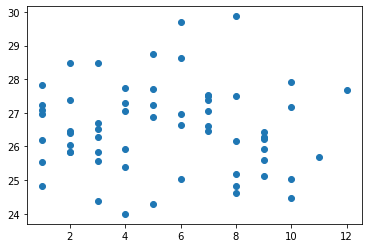

In [12]:
plot_age_scatter(rates, "avg_age")    

In [13]:
def plot_age_range_scatter(low, high):
    col = str(low) + "_" + str(high)
    rates[col] = rates[list(map(str, range(low, high + 1)))].sum(axis=1)
    plot_age_scatter(rates, col)    

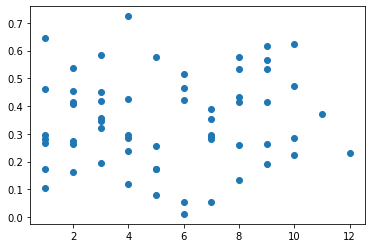

In [14]:
plot_age_range_scatter(15, 24)

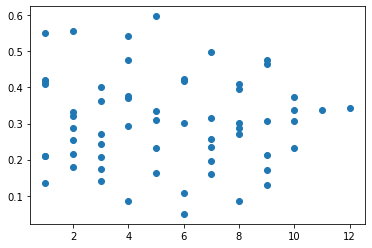

In [15]:
plot_age_range_scatter(25, 27)

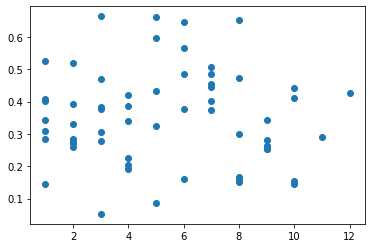

In [16]:
plot_age_range_scatter(28, 42)

## Group all seasons by year

In [17]:
df.index.get_level_values(1).unique()

Index(['2016', '2017', '2018', '2019', '2022', '2023', '2023 Challenge Cup',
       '2020 Challenge Cup', '2020 Fall Series', '2021', '2021 Challenge Cup',
       '2022 Challenge Cup'],
      dtype='object', name='year')

In [18]:
df.index = pd.MultiIndex.from_tuples(
    [(x[0], re.search(r'\d+', x[1]).group()) for x in df.index]
)

In [19]:
df = df.groupby(level=[0, 1]).sum()
df

15     16   17     18      19      20      21      22      23  \
BOS 2016    0.0    0.0  0.0    0.0     0.0     0.0   100.0  1429.0  3093.0   
    2017    0.0    0.0  0.0    0.0     0.0     0.0  1559.0  1626.0  4395.0   
CHI 2016    0.0    0.0  0.0    0.0     0.0     0.0     0.0  1647.0  6440.0   
    2017    0.0    0.0  0.0    0.0     0.0     0.0   134.0   327.0  2682.0   
    2018    0.0    0.0  0.0    0.0     0.0     0.0    90.0   521.0   485.0   
...         ...    ...  ...    ...     ...     ...     ...     ...     ...   
WAS 2020    0.0    0.0  0.0    0.0     0.0     0.0   322.0   490.0  1599.0   
    2021    0.0    0.0  0.0  391.0  1398.0     0.0   952.0  3504.0  1391.0   
    2022    0.0    0.0  0.0    0.0   792.0  1234.0     0.0   718.0  7933.0   
    2023  149.0  464.0  0.0    0.0     0.0   624.0  1011.0  2390.0  3082.0   
WNY 2016    0.0    0.0  0.0    0.0     0.0    45.0  1388.0  4492.0  5995.0   

              24  ...     33     34   35   36   37   38   39   40     41   42  
BOS 2016  4263.0  ...    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  
    2017  5899.0  ...  804.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  
CHI 2016  2912.0  ...    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  
    2017  6555.0  ...    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  
    2018  5950.0  ...    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  
...          ...  ...    ...    ...  ...  ...  ...  ...  ...  ...    ...  ...  
WAS 2020   442.0  ...    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  
    2021  3537.0  ...  653.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  
    2022  1095.0  ...  650.0  180.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  
    2023  5159.0  ...   55.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  541.0  0.0  
WNY 2016  2131.0  ...    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  

[79 rows x 28 columns]

## Plot age distributions for subsets of teams over subsets of years

In [20]:
def plot_subset(sub):
    data = sub.sum()
    plt.bar(data.index, data.values)

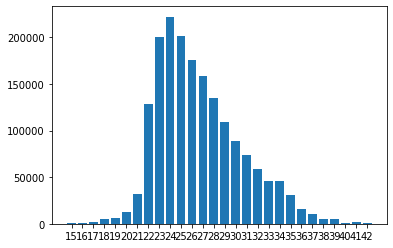

In [21]:
# All teams, all years
plot_subset(df)

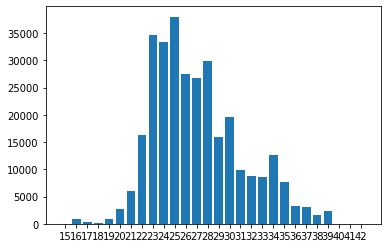

In [22]:
# All teams, 2022
plot_subset(df.loc[(slice(None), '2022'), :])

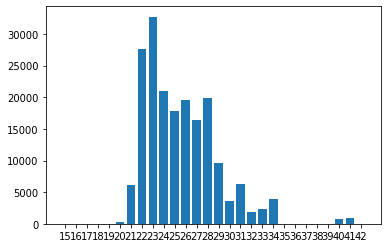

In [23]:
# All teams, 2016
plot_subset(df.loc[(slice(None), '2016'), :])

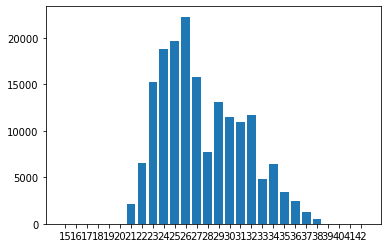

In [24]:
# Reign, all years
plot_subset(df.loc["RGN"])

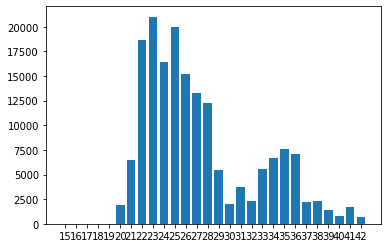

In [26]:
# Gotham, all years
plot_subset(df.loc["NJNY"])

## Figure out how to bucket ages to get 3 equal sized groups

In [27]:
total_mins = df.sum().sum()
total_mins / 3

591522.3333333334

In [28]:
age_agg = df.sum()
age_agg

15       677.0
16      1302.0
17      1727.0
18      5388.0
19      6199.0
20     12180.0
21     32202.0
22    128096.0
23    200725.0
24    221993.0
25    200797.0
26    175790.0
27    158906.0
28    135286.0
29    109102.0
30     89110.0
31     73360.0
32     58366.0
33     46229.0
34     45636.0
35     30904.0
36     15698.0
37     10295.0
38      5267.0
39      5124.0
40      1237.0
41      2251.0
42       720.0
dtype: float64

In [33]:
print(age_agg[0:10].sum())
print(age_agg.index[0], "-", age_agg.index[9])

610489.0
15 - 24


In [35]:
print(age_agg[10:13].sum())
print(age_agg.index[10], "-", age_agg.index[12])

535493.0
25 - 27


In [31]:
print(age_agg[13:].sum())
print(age_agg.index[13], "-", age_agg.index[-1])

628585.0
28 - 42
